# Time series analysis and visualization

In [53]:
import numpy as np
import pandas as pd
import pandas_datareader as pdr
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sbn

In [54]:
%matplotlib inline

## Part 1

- All the graphs have labels in x-axis and y-axis; besides, plots with multiple values has legends.
- Interpolation is demonstrated in the case where I plot daily values only (part 1.2)


### 1.1
show_correlation is a function that receives a stock name and a time period as input arguments, then displays the correlation between Open and Close prices over the last business day of each month within the given period

In [55]:
def show_correlation(name, start, end):
    business_days = pd.date_range(start,end,freq='BM') #Last business day for each month within the range
    df = pdr.DataReader(name, 'yahoo', start, end)[['Close','Open']].loc[business_days] 
    plt.scatter(df.Open, df.Close)
    plt.title(str(name).upper() + " correlation: " + '{:.4f}'.format(df.Close.corr(df.Open)))
    plt.xlabel("Opening")
    plt.ylabel("Closing")
    plt.show()

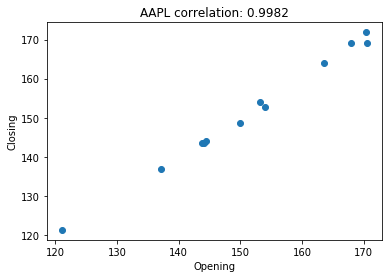

In [56]:
start = dt.date(day=3, month=1, year=2017)
end = dt.date(day=1, month=1, year=2018)
show_correlation("aapl",start,end)

### 1.2
show_daily_features is a function that receives a stock name and time period as input arguments. The function will then output four daily subplots with the same size for each feature; line plots for Low and High prices, histogram plots for Close and Open values

In [57]:
def show_daily_features(name, start, end):
    df = pdr.DataReader(name, 'yahoo', start, end)[['Close','Open','Low','High']]
    dfl = df.resample('D').interpolate(method='time') #Interpolation for the daily plots
    
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15,15))
    fig.suptitle('Daily features for ' + str(name).upper())
    
    ax1.plot(dfl.index, dfl.Low, color="firebrick")
    ax1.set(title='Low', xlabel="days", ylabel="Low prices")
    
    ax2.plot(dfl.index, dfl.High, color="mediumblue")
    ax2.set(title='High', xlabel="days", ylabel="High prices")
    
    ax3.hist(df.Close, color = "skyblue", ec="grey")
    ax3.set(title='Close', xlabel="Close prices", ylabel="Counts")
    
    ax4.hist(df.Open, color = "rebeccapurple", ec="grey")
    ax4.set(title='Open', xlabel="Open prices", ylabel="Counts")
    



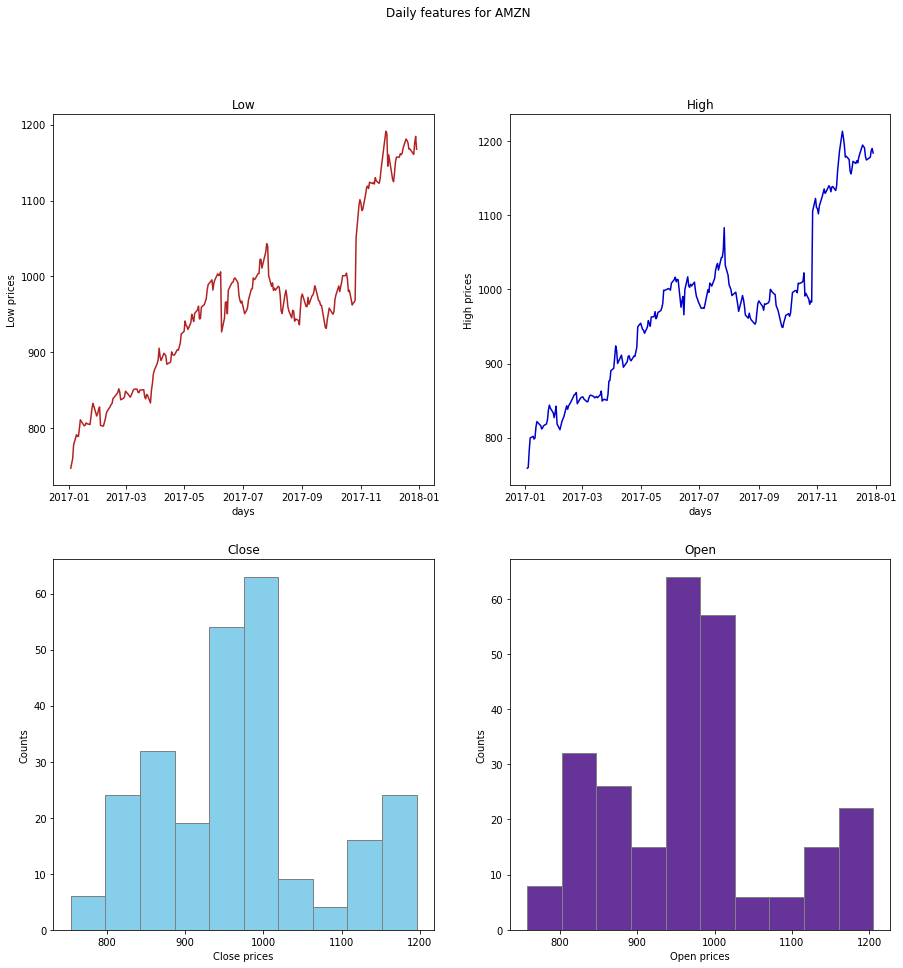

In [58]:
start = dt.date(day=3, month=1, year=2017)
end = dt.date(day=1, month=1, year=2018)
show_daily_features("amzn",start,end)

### 1.3

show_daily_average is a function that receives a stock name and a time period as input agruments. The function will then calculate the monthly average for each feature (Open, Close, Low, High), and then output four line plots in one graph representing the changes in average prives over the given period.

In [59]:
def show_monthly_average(name, start, end):
    df =  pdr.DataReader(name, 'yahoo', start, end)[['Close','Open','Low','High']].resample('M').mean()
    ax = df.plot(figsize=(17,7), title = "Monthly average for " + str(name).upper())
    ax.set(xlabel="Month", ylabel="Monthly average price")
    plt.show()
    

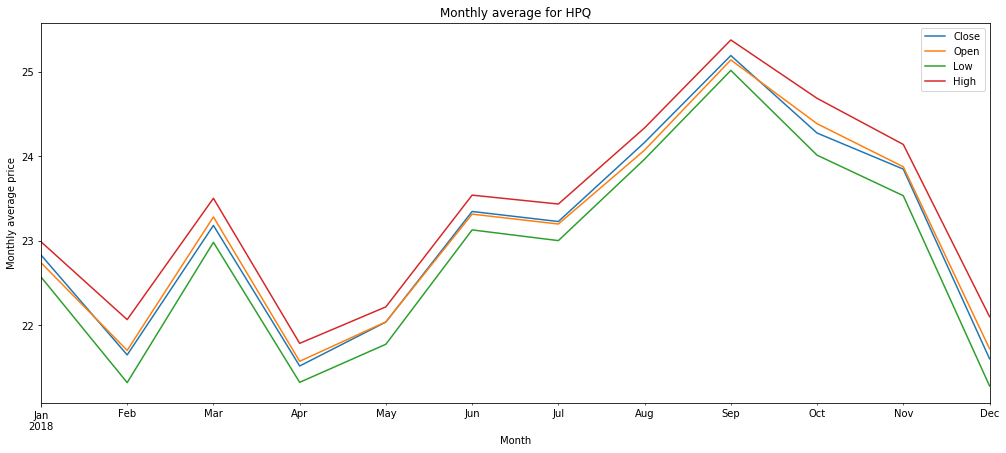

In [60]:
start = dt.date(day=1, month=1, year=2018)
end = dt.date(day=1, month=1, year=2019)
show_monthly_average("hpq",start,end)

### 1.4

show_stock_statistics is a function that receives a stock name and a time period as input agruments. It will then calculate the minimum, maximum and average values of Close price per month. These calculated values will be visualized by a bar plot over the given period.

In [61]:
def show_stock_statistics(name, start, end):
    df =  pdr.DataReader(name, 'yahoo', start, end)['Close'].resample('M')

    p = pd.DataFrame({"mean": df.mean(), "max": df.max(), "min": df.min()})
    p.index = p.index.strftime('%Y-%m') #Format the index dates
    ax = p.plot.bar(figsize=(15,7), title=str(name).upper() + " statistics")
    ax.set(xlabel="Month", ylabel="Close price")
    plt.show()   

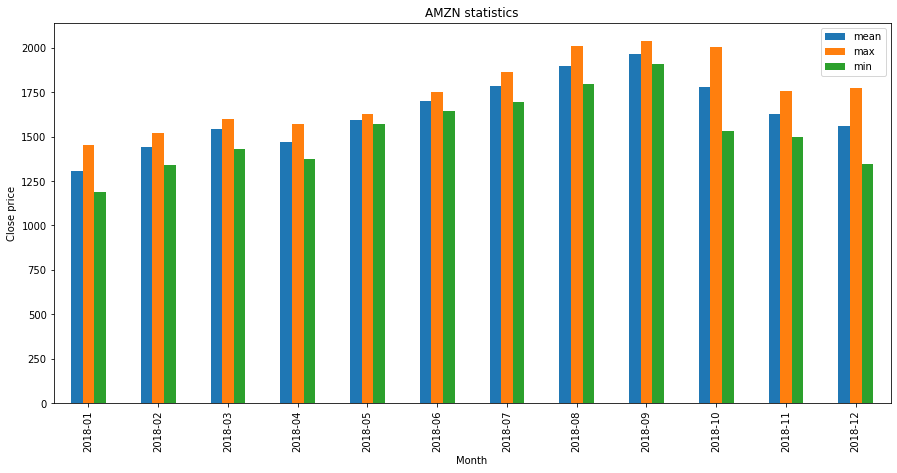

In [62]:
start = dt.date(day=1, month=1, year=2018)
end = dt.date(day=1, month=1, year=2019)
show_stock_statistics("amzn",start,end)
#df =  pdr.DataReader('amzn', 'yahoo', start, end)['Close']

# Part 2

In part 2, I will provide and plot multiple stock data in one graph given a list of stock names and dates. 
show_mulitple_stocks is a function with the following specifications:

- list of stock names and the period as input arguments
- for each stock variable it stores the daily Close price information in a data frame
- the variations of Close prices for all the stock variables given by the time period will be plotted
- the function will also give answeres for 2.1 and 2.2 questions


### 2.1
- In which month in 2016 has stock number 2 had the highest closing price (plot this)
- In which month in 2016 has stock number 3 had the lowest closing price (plot this)


### 2.2
- Year and month where each stock has had the highest average value (mentioned in the output)

In [63]:
def show_multiple_stocks(stock_list, start, end):
    df1 = pdr.DataReader(stock_list, 'yahoo', start, end)['Close']
    df1 = df1.resample('D').interpolate(method='time')
    df = (df1-df1.min())/(df1.max()-df1.min()) #Min-max normalization
    
    ax = df.plot(figsize=(15,10))
    ax.set(title='Stock data for: ' + ", ".join(stock_list), xlabel="monthly dates", ylabel="normalized Close values")
    
    #Month in 2016 where stock nr 2 (GM) had highest closing price
    ymax = df[df.index.year==2016].iloc[:,1].max()
    xmax = df[df.index.year==2016].iloc[:,1].idxmax(axis = 0).strftime('%Y-%m-%d')
    
    #source: https://matplotlib.org/3.1.1/gallery/text_labels_and_annotations/annotation_demo.html
    ax.annotate('date={}\nGM max value={:.2f}'.format(xmax,ymax),
                xy=(xmax, ymax), xycoords='data',
                xytext=(-60, 140), textcoords='offset points',
                bbox=dict(boxstyle="round", fc="0.8"),
                arrowprops=dict(arrowstyle="->",
                                connectionstyle="angle,angleA=0,angleB=90,rad=10"))
   
    #Month in 2016 where stock nr 3 (TSLA) had the lowest closing price
    ymin = df[df.index.year==2016].iloc[:,2].min()
    xmin = df[df.index.year==2016].iloc[:,2].idxmin(axis = 0).strftime('%Y-%m-%d')
    ax.annotate('date={}\nTSLA min value={:.2f}'.format(xmin,ymin),
            xy=(xmin, ymin), xycoords='data',
            xytext=(50, -10), textcoords='offset points',
            bbox=dict(boxstyle="round", fc="0.8"),
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="angle,angleA=0,angleB=90,rad=10"))
    
    #Year and month where each stock had the highest avg value
    max_months = df1.resample("M").mean().idxmax()
    for i,v in max_months.iteritems():
        max_val = df1.loc[v.strftime("%Y-%m-%d")][i]
        print("Highest average value for {} was in {}: {:.3f}".format(i,v.strftime("%b %Y"),max_val))

    plt.show()

Highest average value for F was in Mar 2016: 13.500
Highest average value for GM was in Oct 2017: 42.980
Highest average value for TSLA was in Jun 2017: 361.610


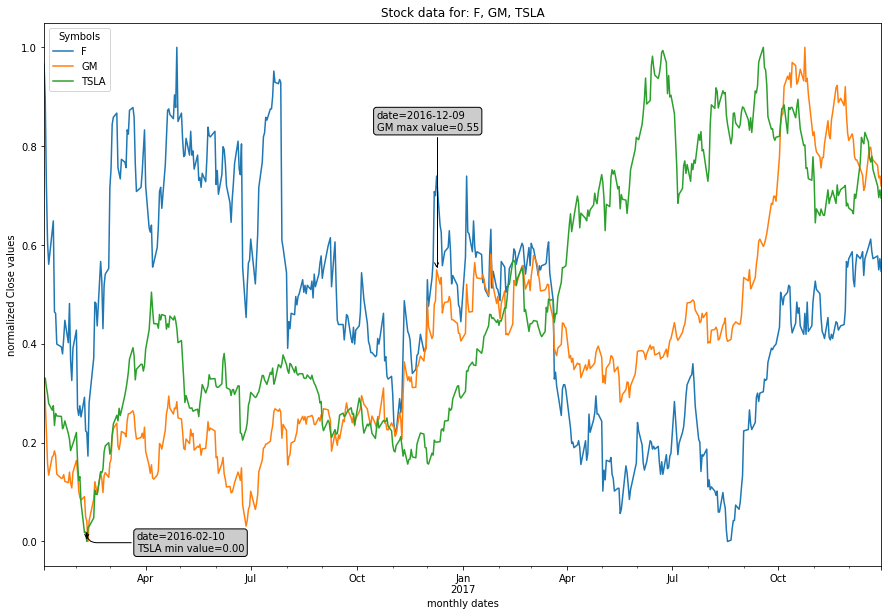

In [64]:
start = dt.date(day=4, month=1, year=2016)
end = dt.date(day=30, month=12, year=2017)
show_multiple_stocks(['F','GM','TSLA'], start,end)